## Pensacola Bay FL - Simple workflow

### Standardize, clean and wrangle Water Quality Portal data in Pensacola and Perdido Bays into more analytic-ready formats using the harmonize_wq package

US EPA’s Water Quality Portal (WQP) aggregates water quality, biological, and physical data provided by many organizations and has become an essential resource with tools to query and retrieval data using python or R. Given the variety of data and variety of data originators, using the data in analysis often requires data cleaning to ensure it meets the required quality standards and data wrangling to get it in a more analytic-ready format. Recognizing the definition of analysis-ready varies depending on the analysis, the harmonixe_wq package is intended to be a flexible water quality specific framework to help:

- Identify differences in data units (including speciation and basis)
- Identify differences in sampling or analytic methods
- Resolve data errors using transparent assumptions
- Reduce data to the columns that are most commonly needed
- Transform data from long to wide format

Domain experts must decide what data meets their quality standards for data comparability and any thresholds for acceptance or rejection.

### Simple workflow (Temperature and Secchi Disk Depth only)

This example steps through a typical workflow in Pensacola and Perdido Bays to demonstrate commonly used functionality

##### Install the required libraries

In [1]:
import sys
#!python -m pip uninstall harmonize-wq --yes
# Use pip to install the package from pypi or the latest from github
#!{sys.executable} -m pip install harmonize-wq
# For latest dev version
#!{sys.executable} -m pip install git+https://github.com/USEPA/harmonize-wq.git@new_release_0-3-8

##### dataretrieval Query for a geojson

In [2]:
import dataretrieval.wqp as wqp
from harmonize_wq import wrangle

In [3]:
# Read geometry for Area of Interest from geojson file url
# NOTE: alternatively you can direct it to a local shapefile
aoi_url = r'https://raw.githubusercontent.com/USEPA/harmonize-wq/main/harmonize_wq/tests/data/PPBays_NCCA.geojson'

<Axes: >

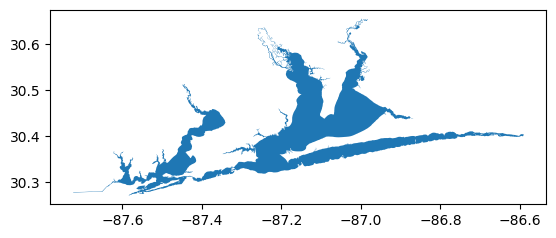

In [4]:
# Map aoi (geojson is WGS1984 standard)
wrangle.as_gdf(aoi_url).plot()

In [5]:
# Build query
query = {'characteristicName': ['Temperature, water',
                                'Depth, Secchi disk depth',
                                ]}
query['bBox'] = wrangle.get_bounding_box(aoi_url)
query['dataProfile'] = 'narrowResult'

In [6]:
# Run query
res_narrow, md_narrow = wqp.get_results(**query)

# dataframe of downloaded results
res_narrow

C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\dataretrieval\wqp.py:83: DtypeWarning: Columns (9,13,17,23,31,61,62,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(response.text), delimiter=',')


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,AnalysisEndTime/TimeZoneCode,ResultLaboratoryCommentCode,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName
0,21FLCBA_WQX,CHOCTAWHATCHEE BASIN ALLIANCE,21FLCBA_WQX-BAS219848-162813,2013-09-23,17:15:00,CST,21FLCBA_WQX-BAS02,STORET-760593202,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1520821F1,2013-07-23,11:01:00,EST,21FLPNS_WQX-33030019,STORET-308146799,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
2,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1540508F1,2013-09-30,11:01:00,EST,21FLPNS_WQX-330300G9,STORET-308177562,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
3,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1523813F1,2013-07-30,09:01:00,EST,21FLPNS_WQX-33010H24,STORET-308173571,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
4,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1520121F1,2013-07-16,09:01:00,EST,21FLPNS_WQX-33010G10,STORET-308247950,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87526,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G5NW0007-10/05/23-FP1,2023-10-05,12:40:00,EST,21FLPNS_WQX-G5NW0007,STORET-993431665,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
87527,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G5NW0007-10/05/23-FP2,2023-10-05,12:40:00,EST,21FLPNS_WQX-G5NW0007,STORET-993427061,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
87528,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G5NW0035-10/05/23-FP1,2023-10-05,13:10:00,EST,21FLPNS_WQX-G5NW0035,STORET-993418970,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
87529,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G4NW0508-10/17/23-FP2,2023-10-17,11:55:00,EST,21FLPNS_WQX-G4NW0508,STORET-993431681,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET


#### Harmonize and clean all results

In [7]:
from harmonize_wq import harmonize
from harmonize_wq import clean

In [8]:
# Harmonize all results
df_harmonized = harmonize.harmonize_all(res_narrow, errors='raise')
df_harmonized

C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName,QA_flag,Secchi,Temperature
0,21FLCBA_WQX,CHOCTAWHATCHEE BASIN ALLIANCE,21FLCBA_WQX-BAS219848-162813,2013-09-23,17:15:00,CST,21FLCBA_WQX-BAS02,STORET-760593202,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN,NaN,26.0555555555556 degree_Celsius
1,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1520821F1,2013-07-23,11:01:00,EST,21FLPNS_WQX-33030019,STORET-308146799,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN,NaN,23.12 degree_Celsius
2,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1540508F1,2013-09-30,11:01:00,EST,21FLPNS_WQX-330300G9,STORET-308177562,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN,NaN,16.43 degree_Celsius
3,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1523813F1,2013-07-30,09:01:00,EST,21FLPNS_WQX-33010H24,STORET-308173571,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN,NaN,29.78 degree_Celsius
4,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1520121F1,2013-07-16,09:01:00,EST,21FLPNS_WQX-33010G10,STORET-308247950,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN,NaN,26.72 degree_Celsius
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87526,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G5NW0007-10/05/23-FP1,2023-10-05,12:40:00,EST,21FLPNS_WQX-G5NW0007,STORET-993431665,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN,NaN,26.8 degree_Celsius
87527,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G5NW0007-10/05/23-FP2,2023-10-05,12:40:00,EST,21FLPNS_WQX-G5NW0007,STORET-993427061,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN,NaN,27.5 degree_Celsius
87528,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G5NW0035-10/05/23-FP1,2023-10-05,13:10:00,EST,21FLPNS_WQX-G5NW0035,STORET-993418970,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN,NaN,27.8 degree_Celsius
87529,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G4NW0508-10/17/23-FP2,2023-10-17,11:55:00,EST,21FLPNS_WQX-G4NW0508,STORET-993431681,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN,NaN,24.5 degree_Celsius


In [9]:
# Clean up other columns of data
df_cleaned = clean.datetime(df_harmonized)  # datetime
df_cleaned = clean.harmonize_depth(df_cleaned)  # Sample depth
df_cleaned

C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\dataretrieval\utils.py:87: UserWarning: Warning: 9056 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(
C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName,QA_flag,Secchi,Temperature,Activity_datetime,Depth
0,21FLCBA_WQX,CHOCTAWHATCHEE BASIN ALLIANCE,21FLCBA_WQX-BAS219848-162813,2013-09-23,17:15:00,-0600,21FLCBA_WQX-BAS02,STORET-760593202,NaN,NaN,...,NaN,NaN,NaN,NaN,STORET,NaN,NaN,26.0555555555556 degree_Celsius,2013-09-23 23:15:00+00:00,NaN
1,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1520821F1,2013-07-23,11:01:00,-0500,21FLPNS_WQX-33030019,STORET-308146799,NaN,NaN,...,NaN,NaN,NaN,NaN,STORET,NaN,NaN,23.12 degree_Celsius,2013-07-23 16:01:00+00:00,NaN
2,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1540508F1,2013-09-30,11:01:00,-0500,21FLPNS_WQX-330300G9,STORET-308177562,NaN,NaN,...,NaN,NaN,NaN,NaN,STORET,NaN,NaN,16.43 degree_Celsius,2013-09-30 16:01:00+00:00,NaN
3,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1523813F1,2013-07-30,09:01:00,-0500,21FLPNS_WQX-33010H24,STORET-308173571,NaN,NaN,...,NaN,NaN,NaN,NaN,STORET,NaN,NaN,29.78 degree_Celsius,2013-07-30 14:01:00+00:00,NaN
4,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-1520121F1,2013-07-16,09:01:00,-0500,21FLPNS_WQX-33010G10,STORET-308247950,NaN,NaN,...,NaN,NaN,NaN,NaN,STORET,NaN,NaN,26.72 degree_Celsius,2013-07-16 14:01:00+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87526,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G5NW0007-10/05/23-FP1,2023-10-05,12:40:00,-0500,21FLPNS_WQX-G5NW0007,STORET-993431665,NaN,NaN,...,NaN,NaN,NaN,NaN,STORET,NaN,NaN,26.8 degree_Celsius,2023-10-05 17:40:00+00:00,NaN
87527,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G5NW0007-10/05/23-FP2,2023-10-05,12:40:00,-0500,21FLPNS_WQX-G5NW0007,STORET-993427061,NaN,NaN,...,NaN,NaN,NaN,NaN,STORET,NaN,NaN,27.5 degree_Celsius,2023-10-05 17:40:00+00:00,NaN
87528,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G5NW0035-10/05/23-FP1,2023-10-05,13:10:00,-0500,21FLPNS_WQX-G5NW0035,STORET-993418970,NaN,NaN,...,NaN,NaN,NaN,NaN,STORET,NaN,NaN,27.8 degree_Celsius,2023-10-05 18:10:00+00:00,NaN
87529,21FLPNS_WQX,"FL Dept. of Environmental Protection, Northwes...",21FLPNS_WQX-G4NW0508-10/17/23-FP2,2023-10-17,11:55:00,-0500,21FLPNS_WQX-G4NW0508,STORET-993431681,NaN,NaN,...,NaN,NaN,NaN,NaN,STORET,NaN,NaN,24.5 degree_Celsius,2023-10-17 16:55:00+00:00,NaN


#### Transform results from long to wide format

There are many columns in the dataframe that are characteristic specific, that is they have different values for the same sample depending on the characteristic. To ensure one result for each sample after the transformation of the data these columns must either be split, generating a new column for each characteristic with values, or moved out from the table if not being used.

In [10]:
from harmonize_wq import wrangle

# Split QA column into multiple characteristic specific QA columns
df_full = wrangle.split_col(df_cleaned)

# Divide table into columns of interest (main_df) and characteristic specific metadata (chars_df)
main_df, chars_df = wrangle.split_table(df_full)

# Combine rows with the same sample organization, activity, location, and datetime
df_wide = wrangle.collapse_results(main_df)

# Reduced columns
df_wide.columns

Index(['OrganizationFormalName', 'ProviderName', 'Secchi', 'Temperature',
       'Depth', 'QA_Secchi', 'QA_Temperature'],
      dtype='object')

Results are collapsed by retaining the first result that isn't NAN. There can be several reasons for multiple results for the same parameter/characteristic sampled at the same station, time and by the same organization. The collapse_results function assumes the user has already reviewed the quality of all results and narrowed down instances of multiple results to only the desired/best/highest quality result before running this function.

#### Map results

In [11]:
from harmonize_wq import location
from harmonize_wq import visualize

# Get harmonized stations clipped to the Area of Interest
stations_gdf, stations, site_md = location.get_harmonized_stations(query, aoi=aoi_url)

<Axes: >

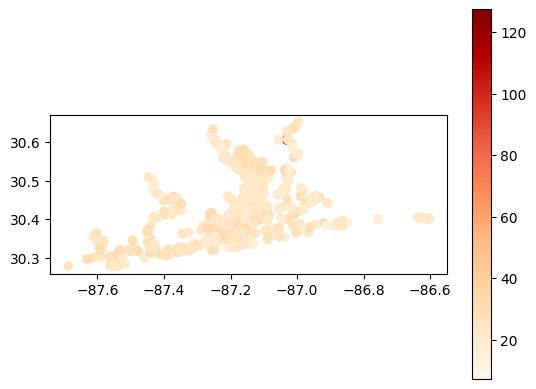

In [12]:
# Map average temperature results at each station
gdf_temperature = visualize.map_measure(df_wide, stations_gdf, 'Temperature')
gdf_temperature.plot(column='mean', cmap='OrRd', legend=True)